In [ ]:
#Given a Bank customer, can we build a classifier which can determine whether they will leave or not?
#Dataset from https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [2]:
#importing librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#read data
all_data = pd.read_csv("Documents/Churn_Modelling.csv")

In [6]:
all_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Checking all data info, seems quite well formated and no missing value

In [8]:
#We can find there are only data for three countries,50% are for France, numbers of Germany and Spain are very close

In [9]:
all_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

E:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


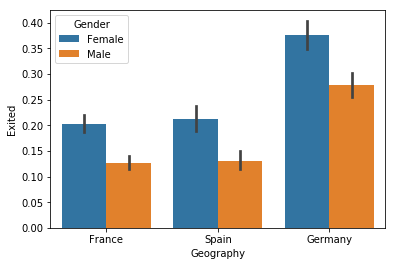

In [10]:
#Check the relationship between country and 'Exited', so German quit more that other countries and from gender perspective, females are more intended to quit
sns.barplot(x='Geography',y='Exited', hue='Gender',data=all_data)

In [11]:
all_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
#One-hot encoding Gender,Geography,NumOfProducts

dummy_gender = pd.get_dummies(all_data['Gender'], prefix='Gender')
dummy_geo = pd.get_dummies(all_data['Geography'],prefix = 'Geo')
dummy_NoOfProducts=pd.get_dummies(all_data['NumOfProducts'],prefix='NOP')

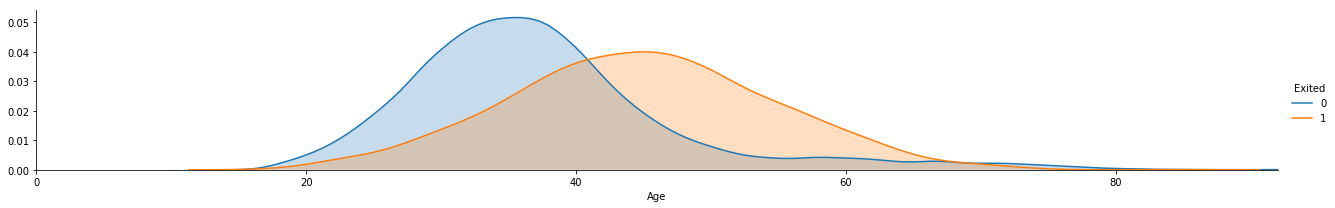

In [13]:
#Check how the number of exited change according to the age
a=sns.FacetGrid(all_data,hue='Exited',aspect=6)
a.map(sns.kdeplot,'Age',shade=True)
a.set(xlim=[0,all_data['Age'].max()])
a.add_legend()

In [14]:
#Split age into 6 section, according to bank starndard

bins = [18,22,34,40,60,80,100]
labels = ['18-22','23-34','35-40','41-60','61-80','81-100']
dummy_age_labels=pd.cut(all_data['Age'],bins,labels=labels,right=False)

In [15]:
all_data['Age_labeled']= dummy_age_labels

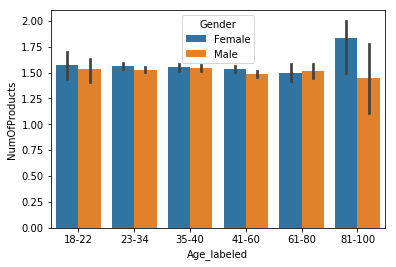

In [16]:
#This chart shows that number of product held by people in each age section, #and we can find at most sections, female hold more than male

sns.barplot(x='Age_labeled',y='NumOfProducts',hue='Gender', data = all_data)

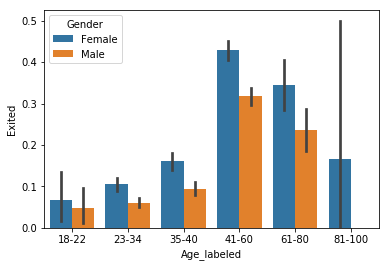

In [17]:
#Check how Age, Gender related to 'Exited', the chart below show that no matter male or female, if people intend to exit, most of them will do this between 41-80 years old. Also, number of female exit is more that of male.
sns.barplot(x = 'Age_labeled',y='Exited',hue='Gender',data=all_data)

In [18]:
dummy_age=pd.get_dummies(all_data['Age_labeled'],prefix='Age')

In [19]:
#Split credit score into 5 sections, based on FICO standard
#300-579 Very Poor
#580-669 Fair
#670-739 Good
#740-799 Very Good
#800-850 Exceptional
bins =[300,579,669,739,799,850]
labels =['Very Poor','Fair','Good','Very Good','Exceptional']
dummy_crdscore_labels=pd.cut(all_data['CreditScore'],bins,labels=labels)
all_data['CreditScore_labled']= dummy_crdscore_labels
dummy_creditscore = pd.get_dummies(all_data['CreditScore_labled'], prefix = 'CreditLevel')

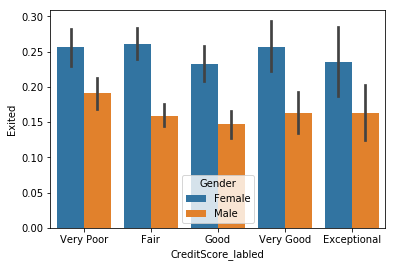

In [21]:
#From the chart below, people who have Good credit score are more intend to stay with the bank

sns.barplot(x = 'CreditScore_labled',y='Exited',hue='Gender',data=all_data)

In [22]:
#Split Tenure into 4 section, according to bank standard

bins = [0,1,5,8,11]
labels = ['0-1','1-5','5-8','8-11']
dummy_tenure_labels=pd.cut(all_data['Tenure'],bins,labels=labels,right=False)
all_data['Tenure_labeled']= dummy_tenure_labels
dummy_tenure = pd.get_dummies(all_data['Tenure_labeled'],prefix = 'Tenure')

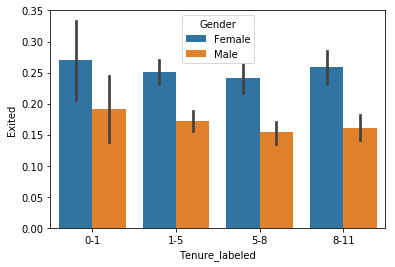

In [24]:
#From the chat below, we can find with the tenure increasing, people are more intend to stay with bank, especially for male

sns.barplot(x = 'Tenure_labeled',y='Exited',hue='Gender',data=all_data)

In [25]:
#Standardize Balance and EstimatedSalary

from sklearn.preprocessing import StandardScaler
all_data['Balance'] = StandardScaler().fit_transform(all_data.filter(['Balance']))
all_data['EstimatedSalary'] = StandardScaler().fit_transform(all_data.filter(['EstimatedSalary']))

In [26]:
#Combine all prepared columns and drop original ones

data_combined = pd.concat([
    all_data, dummy_age, dummy_tenure, dummy_creditscore, dummy_geo,
    dummy_gender, dummy_NoOfProducts
],
                          axis=1)

data_combined.drop(
    ['Gender', 'Age', 'CreditScore', 'Geography', 'NumOfProducts', 'Tenure'],
    axis=1,
    inplace=True)

In [27]:
data_combined.drop([
    'Surname', 'CustomerId', 'Age_labeled', 'CreditScore_labled',
    'Tenure_labeled'
],
                   axis=1,
                   inplace=True)

In [28]:
data_combined.head()

,RowNumber,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_18-22,Age_23-34,Age_35-40,Age_41-60,...,CreditLevel_Exceptional,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male,NOP_1,NOP_2,NOP_3,NOP_4
0,1,-1.225848,1,1,0.021886,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,2,0.117350,0,1,0.216534,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,3,1.333053,1,0,0.240687,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,4,-1.225848,0,0,-0.108918,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,5,0.785728,1,1,-0.365276,0,0,0,0,1,...,1,0,0,1,1,0,1,0,0,0


In [29]:
#Label value
y_label=data_combined['Exited']
y_label.shape

(10000,)

In [30]:
#Remove lable value, keep training featurers only.
data_combined.drop(['Exited'],axis=1, inplace = True)

In [31]:
X_data = data_combined

In [32]:
#Split data into trainging set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,y_label,test_size=0.2,random_state=2)

In [33]:
#Use grid search to find best super parameter for random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'n_estimators': [50, 100, 150],
        'max_leaf_nodes':[50,100,150]
    },
    {
        'bootstrap': [False],
        'n_estimators': [50, 100,150],
    },
]
churn_mdl_rf_sm = RandomForestClassifier()
grid_search = GridSearchCV(
    churn_mdl_rf_sm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [50, 100, 150], 'max_leaf_nodes': [50, 100, 150]}, {'bootstrap': [False], 'n_estimators': [50, 100, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [34]:
#Check the best parameters
grid_search.best_params_

{'max_leaf_nodes': 150, 'n_estimators': 150}

In [35]:
#Use the best parameters for the classifier
churn_mdl_rf = RandomForestClassifier(
    random_state=2,
    n_estimators=150,
    n_jobs=4,
    max_leaf_nodes=150
)
churn_mdl_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=150,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=4,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [36]:
#Use cross validate to evaluate the model，accuracy is about 85%

from sklearn.model_selection import cross_val_score
cross_val_score(churn_mdl_rf,x_train, y_train,cv=5)

array([0.85758901, 0.855625  , 0.85375   , 0.84625   , 0.8492808 ])

In [37]:
#Cross validation by using testing dataset

cross_val_score(churn_mdl_rf,x_test, y_test,cv=5)

array([0.83541147, 0.85286783, 0.8375    , 0.84711779, 0.84210526])

In [39]:
#Cross validation by using the whole dataset
from sklearn.model_selection import cross_val_score
cross_val_score(churn_mdl_rf,X_data, y_label,cv=5)

array([0.85107446, 0.85657171, 0.8485    , 0.85042521, 0.83291646])